# PCA Matplotlib - [Decathlon2](https://rpkgs.datanovia.com/factoextra/reference/decathlon2.html)

In [1]:
# Chargement des données
from scientisttools.datasets import load_decathlon2
decathlon = load_decathlon2()

In [2]:
# ACP normée
from scientisttools.decomposition import PCA
acp = PCA(normalize=True,
          n_components = None,
          row_labels=decathlon.index[:23],
          col_labels=decathlon.columns[:10],
          row_sup_labels=decathlon.index[23:],
          quanti_sup_labels=["Rank","Points"],
          quali_sup_labels=["Competition"],
          parallelize=True)
acp.fit(decathlon)

PCA(col_labels=Index(['X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m', 'X110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', 'X1500m'],
      dtype='object'),
    parallelize=True, quali_sup_labels=['Competition'],
    quanti_sup_labels=['Rank', 'Points'],
    row_labels=Index(['SEBRLE', 'CLAY', 'BERNARD', 'YURKOV', 'ZSIVOCZKY', 'McMULLEN',
       'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON', 'Sebrle', 'Clay',
       'Karpov', 'Macey', 'Warners', 'Zsivoczky', 'Hernu', 'Bernard',
       'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras'],
      dtype='object', name='name'),
    row_sup_labels=Index(['KARPOV', 'WARNERS', 'Nool', 'Drews'], dtype='object', name='name'))

## Scree plot

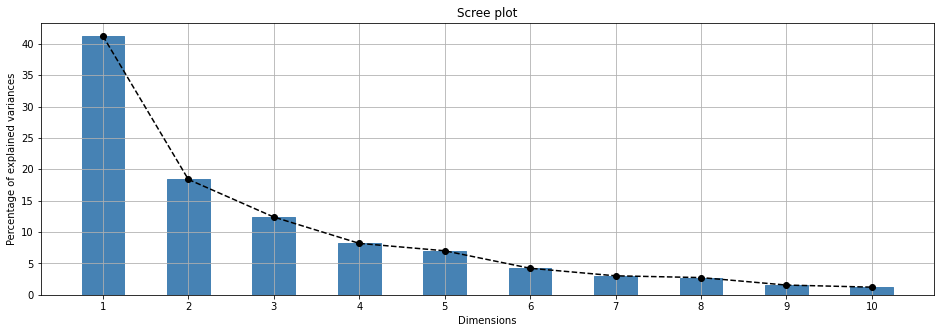

In [3]:
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(acp,choice="proportion",ax=axe)
plt.show()

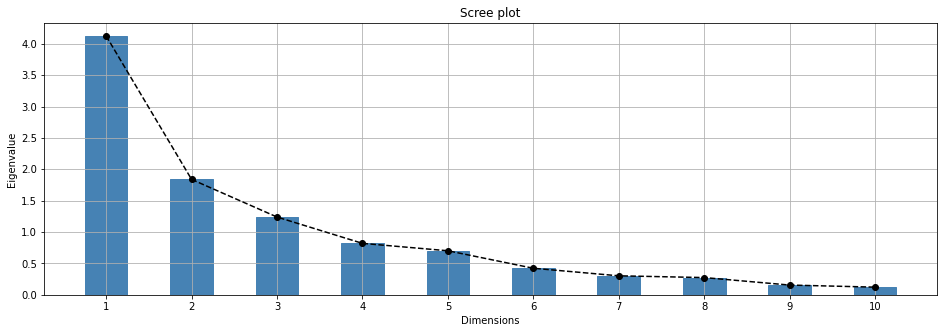

In [4]:
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe)
plt.show()

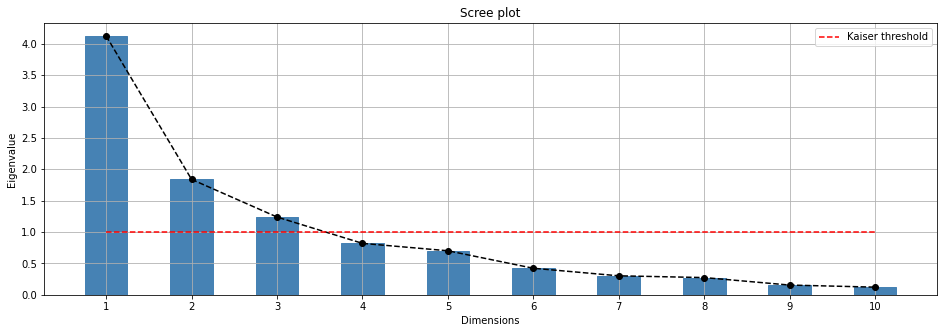

In [5]:
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe,add_kaiser=True)
plt.show()

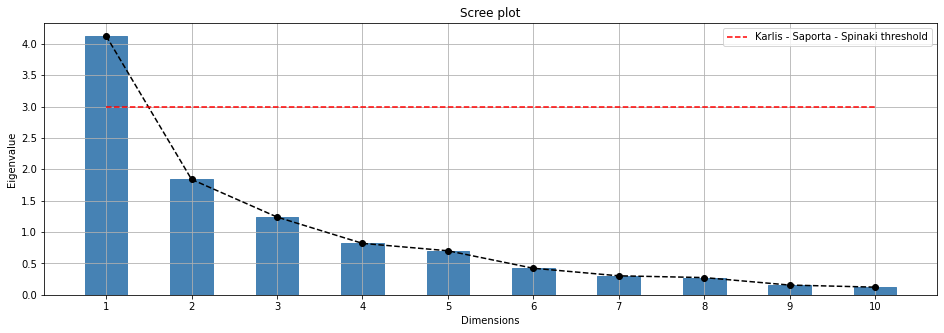

In [6]:
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe,add_kss=True)
plt.show()

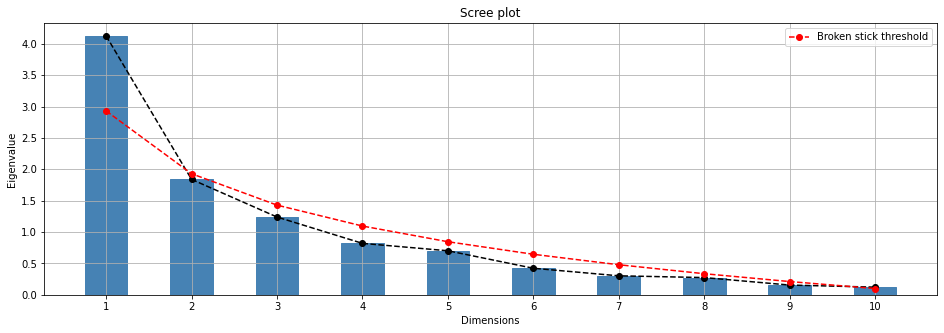

In [7]:
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe,add_broken_stick=True)
plt.show()

In [8]:
from scientisttools.extractfactor import get_eigenvalue
eig = get_eigenvalue(acp)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,4.124213,2.285682,41.242133,41.242133
Dim.2,1.838531,0.599391,18.385309,59.627443
Dim.3,1.239140,0.419700,12.391403,72.018845
Dim.4,0.819440,0.117887,8.194402,80.213247
Dim.5,0.701553,0.278670,7.015528,87.228776
Dim.6,0.422883,0.120301,4.228828,91.457604
Dim.7,0.302582,0.028112,3.025817,94.483420
Dim.8,0.274470,0.119253,2.744700,97.228120
Dim.9,0.155217,0.033246,1.552169,98.780290
Dim.10,0.121971,NaN,1.219710,100.000000


## Extract Individuals

In [9]:
from scientisttools.extractfactor import get_pca_ind
ind = get_pca_ind(acp)
print(ind.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])


In [10]:
# Row coordinates
display(ind["coord"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
SEBRLE,0.195505,1.589057,-0.642491,0.083897,1.168294,0.474324,-0.212634,0.044437,-0.674163,0.033468
CLAY,0.807879,2.474814,1.387383,1.298382,-0.824982,-1.333512,-0.217704,0.631113,-0.061477,-0.324288
BERNARD,-1.359134,1.648095,-0.200558,-1.964094,0.084193,0.409633,-0.415572,0.719675,0.173906,-0.101308
YURKOV,-0.888953,-0.442607,-2.529584,0.712908,0.407823,-0.105175,-0.332176,0.117581,-0.111986,-0.122387
ZSIVOCZKY,-0.108122,-2.068838,1.334259,-0.101528,-0.201452,-0.915668,0.090240,-0.206889,-0.534860,-0.356253
McMULLEN,0.121220,-1.013910,0.862517,1.341643,1.621513,-0.190766,0.489034,0.299677,-0.107997,-0.402015


In [11]:
# Row cos2
display(ind["cos2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
SEBRLE,0.007530,0.497473,0.081325,0.001387,0.268903,0.044324,0.008908,0.000389,0.089541,0.000221
CLAY,0.048701,0.457017,0.143628,0.125792,0.050785,0.132691,0.003537,0.029721,0.000282,0.007847
BERNARD,0.197200,0.289966,0.004294,0.411819,0.000757,0.017913,0.018436,0.055291,0.003229,0.001096
YURKOV,0.096110,0.023826,0.778230,0.061813,0.020228,0.001345,0.013420,0.001681,0.001525,0.001822
ZSIVOCZKY,0.001574,0.576419,0.239754,0.001388,0.005465,0.112918,0.001097,0.005764,0.038527,0.017092
McMULLEN,0.002175,0.152195,0.110138,0.266487,0.389262,0.005388,0.035406,0.013296,0.001727,0.023927


In [12]:
# Row contrib
display(ind["contrib"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
SEBRLE,0.040294,5.971453,1.448392,0.037346,8.458941,2.313137,0.649673,0.031280,12.730999,0.039928
CLAY,0.688057,14.483925,6.753738,8.944583,4.217944,18.282929,0.681024,6.309449,0.105865,3.748675
BERNARD,1.947402,6.423411,0.141135,20.468194,0.043931,1.725207,2.481546,8.204463,0.847153,0.365852
YURKOV,0.833084,0.463273,22.451740,2.696636,1.030753,0.113731,1.585499,0.219002,0.351283,0.533935
ZSIVOCZKY,0.012324,10.121714,6.246432,0.054692,0.251510,8.620418,0.117011,0.678034,8.013325,4.524112
McMULLEN,0.015491,2.431085,2.610279,9.550559,16.294933,0.374157,3.436426,1.422605,0.326706,5.761014


In [13]:
# Row informations
display(ind["infos"].head(6))

,"d(i,G)",p(i),"I(i,G)"
name,,,
SEBRLE,2.252966,0.043478,0.220689
CLAY,3.660804,0.043478,0.582673
BERNARD,3.060617,0.043478,0.407277
YURKOV,2.867445,0.043478,0.357489
ZSIVOCZKY,2.724941,0.043478,0.322839
McMULLEN,2.598958,0.043478,0.293678


In [14]:
ind_sup = ind["ind_sup"]
print(ind_sup.keys())

dict_keys(['coord', 'cos2', 'dist'])


In [15]:
# Supplementary row coordinates
display(ind_sup["coord"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
KARPOV,0.794721,0.779512,1.633020,1.724228,-0.750704,0.896169,-1.098796,1.274767,-1.116264,-0.220344
WARNERS,-0.386464,-0.121592,1.738733,-0.706334,-0.032300,1.184042,-0.325321,-0.426931,-0.706526,0.536904
Nool,-0.559131,1.977489,0.483036,-2.278453,-0.254615,0.558212,-0.476151,-0.060161,0.673408,-0.287828
Drews,-1.109204,0.017415,3.048818,-1.534347,-0.326422,0.474942,0.348327,0.015643,-0.017160,-0.169525


In [16]:
# Supplementary row cosinus
display(ind_sup["cos2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
KARPOV,0.051047,0.049112,0.215537,0.240286,0.045549,0.064911,0.097583,0.131341,0.100710,0.003924
WARNERS,0.024227,0.002398,0.490397,0.080929,0.000169,0.227413,0.017168,0.029566,0.080973,0.046760
Nool,0.028971,0.362387,0.021622,0.481088,0.006008,0.028876,0.021010,0.000335,0.042024,0.007677
Drews,0.092071,0.000023,0.695605,0.176176,0.007974,0.016880,0.009080,0.000018,0.000022,0.002151


In [17]:
# Supplementary row disto
display(ind_sup["dist"].head(6))

,"d(i,G)"
name,
KARPOV,3.517470
WARNERS,2.482899
Nool,3.284943
Drews,3.655527


## Extract variables

In [18]:
# 
from scientisttools.extractfactor import get_pca_var
var = get_pca_var(acp)
print(var.keys())

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'cor', 'quanti_sup', 'quali_sup'])


In [19]:
# Variables coordinates
display(var["coord"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850626,-0.179398,-0.301556,0.033573,-0.194444,-0.035375,-0.091336,-0.104717,-0.303064,0.044418
Long.jump,0.794181,0.280857,0.190547,-0.115390,0.233157,0.033728,-0.154331,-0.397381,-0.051590,0.029719
Shot.put,0.733913,0.085404,-0.517598,0.128468,-0.248813,0.239789,-0.009887,0.024359,0.047787,0.217452
High.jump,0.610084,-0.465214,-0.330085,0.144550,0.402700,0.284645,0.028157,0.084406,-0.112138,-0.133567
X400m,-0.701603,0.290178,-0.283533,0.430826,0.103909,0.049290,0.286106,-0.233552,0.082160,-0.034171
X110m.hurdle,-0.764125,-0.024741,-0.448887,-0.016896,0.224220,-0.002632,-0.370072,-0.008345,0.161760,-0.015630


In [20]:
# Variables cos2
display(var["cos2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,0.723564,0.032184,0.090936,0.001127,0.037808,0.001251,0.008342,0.010966,0.091848,0.001973
Long.jump,0.630723,0.078881,0.036308,0.013315,0.054362,0.001138,0.023818,0.157911,0.002661,0.000883
Shot.put,0.538628,0.007294,0.267907,0.016504,0.061908,0.057499,0.000098,0.000593,0.002284,0.047285
High.jump,0.372202,0.216424,0.108956,0.020895,0.162167,0.081023,0.000793,0.007124,0.012575,0.017840
X400m,0.492247,0.084203,0.080391,0.185611,0.010797,0.002430,0.081857,0.054547,0.006750,0.001168
X110m.hurdle,0.583887,0.000612,0.201500,0.000285,0.050275,0.000007,0.136953,0.000070,0.026166,0.000244


In [21]:
# Variables contrib
display(var["contrib"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,17.544293,1.750510,7.338659,0.137552,5.389252,0.295915,2.757053,3.995204,59.174001,1.617561
Long.jump,15.293168,4.290416,2.930094,1.624859,7.748815,0.269004,7.871594,57.533222,1.714683,0.724144
Shot.put,13.060137,0.396722,21.620432,2.014073,8.824401,13.596859,0.032304,0.216185,1.471201,38.767686
High.jump,9.024811,11.771584,8.792888,2.549880,23.115504,19.159607,0.262026,2.595658,8.101552,14.626491
X400m,11.935544,4.579930,6.487636,22.650906,1.539012,0.574510,27.052747,19.873444,4.348967,0.957305
X110m.hurdle,14.157544,0.033293,16.261261,0.034837,7.166193,0.001639,45.261635,0.025370,16.857939,0.200289


In [22]:
# Supplementary quantitatives variables
vsQuant = var["quanti_sup"]
vsQuant.keys()

dict_keys(['corr', 'coord', 'cos2', 'ftest'])

In [23]:
# Supplementary quantitatives variables coordinates
display(vsQuant["coord"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Rank,-0.701478,-0.245194,0.183429,0.055752,-0.073826,0.022949,0.373385,-0.118938,0.203495,0.282892
Points,0.963708,0.077683,-0.158022,-0.166231,-0.031147,0.071696,0.025038,-0.030716,-0.002575,-0.069998


In [24]:
# Supplementary quantitatives variables cos2
display(vsQuant["cos2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Rank,0.492071,0.060120,0.033646,0.003108,0.00545,0.000527,0.139417,0.014146,0.041410,0.080028
Points,0.928732,0.006035,0.024971,0.027633,0.00097,0.005140,0.000627,0.000943,0.000007,0.004900


In [25]:
# Supplementary qualitatives variables
vsQual = var["quali_sup"]
vsQual.keys()

dict_keys(['stats', 'coord', 'cos2', 'dist', 'eta2', 'vtest'])

In [26]:
# Supplementary qualitatives variables coordinates
display(vsQual["coord"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Competition_Decastar,-1.343451,0.121810,0.037895,0.180836,0.134336,-0.196096,-0.219921,0.052247,-0.163979,-0.075695
Competition_OlympicG,1.231497,-0.111659,-0.034737,-0.165766,-0.123142,0.179755,0.201594,-0.047893,0.150314,0.069387


In [27]:
# Supplementary qualitatives variables cos2
display(vsQual["cos2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Competition_Decastar,0.905123,0.007441,0.00072,0.0164,0.00905,0.019284,0.024255,0.001369,0.013485,0.002873
Competition_OlympicG,0.905123,0.007441,0.00072,0.0164,0.00905,0.019284,0.024255,0.001369,0.013485,0.002873


In [28]:
# Supplementary qualitatives variables vtest
display(vsQual["vtest"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Competition_Decastar,-2.970766,0.403426,0.152877,0.897104,0.720246,-1.35418,-1.795406,0.44785,-1.869108,-0.973318
Competition_OlympicG,2.970766,-0.403426,-0.152877,-0.897104,-0.720246,1.35418,1.795406,-0.44785,1.869108,0.973318


In [29]:
# Supplementary qualitatives variables distances
display(vsQual["dist"].head(6))

,dist
Competition_Decastar,1.412108
Competition_OlympicG,1.294433


In [30]:
# Supplementary qualitatives variables eta2
display(vsQual["eta2"].head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Competition,0.401157,0.007398,0.001062,0.036582,0.02358,0.083355,0.146522,0.009117,0.158798,0.043061


## Individuals Factor Map - PCA

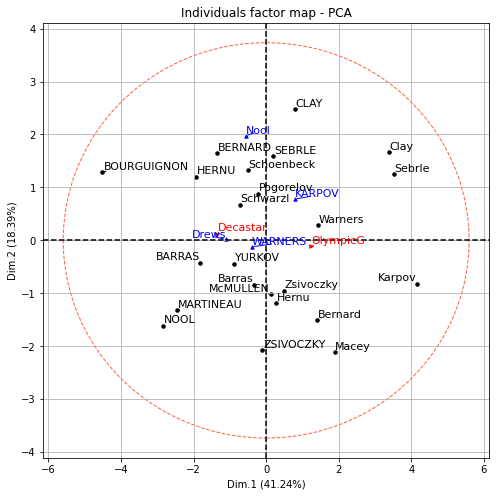

In [31]:
from scientisttools.pyplot import plot_pca_ind
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_ind(acp,ax=axe,repel=True,hotelling_ellipse=True)
plt.show()

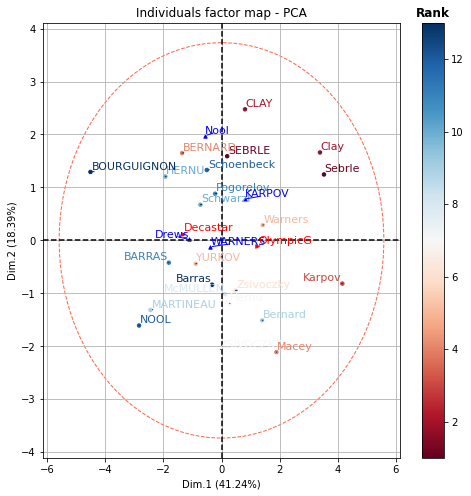

In [32]:
# Using Columns
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_ind(acp,color="Rank",ax=axe,repel=True,hotelling_ellipse=True)
plt.show()

In [33]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=23)
color_numpy

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ,
        0.73736858,  1.49073203, -0.93583387])

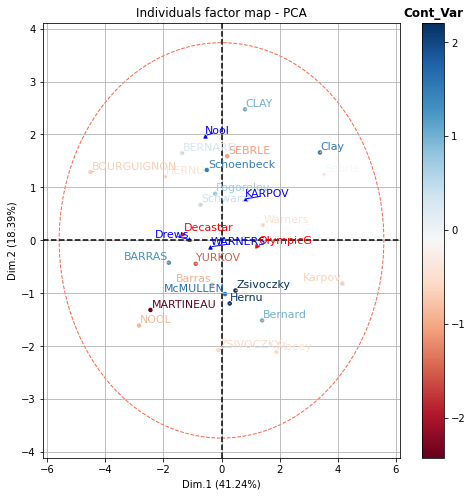

In [34]:
fig, axe =plt.subplots(figsize=(8,8))
plot_pca_ind(acp,color=color_numpy,ax=axe,repel=True,hotelling_ellipse=True)
plt.show()

In [35]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(acp.row_coord_)
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2])

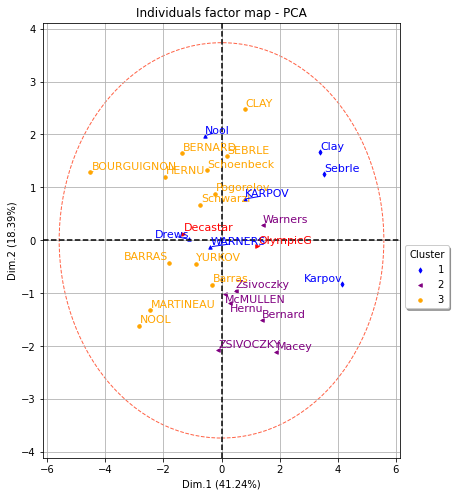

In [36]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_ind(acp,color=kmeans,ax=axe,repel=True,hotelling_ellipse=True,random_state=123)
plt.show()

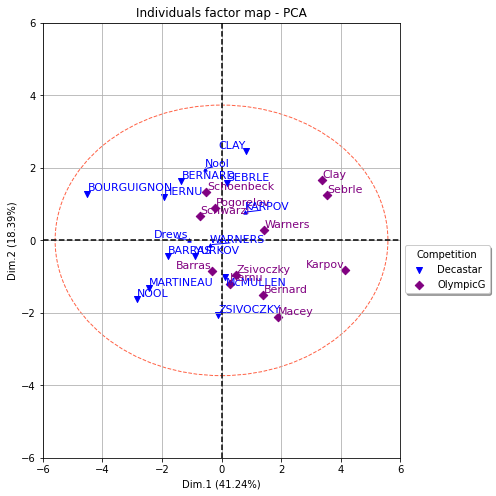

In [37]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_ind(acp,ax=axe,xlim=(-6,6),ylim=(-6,6),repel=True,hotelling_ellipse=True,random_state=123,habillage="Competition")
plt.show()

## Variables

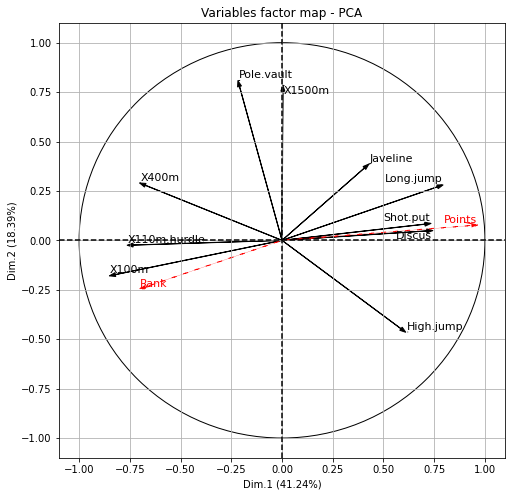

In [38]:
from scientisttools.pyplot import plot_pca_var
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_var(acp,repel=True)
plt.show()

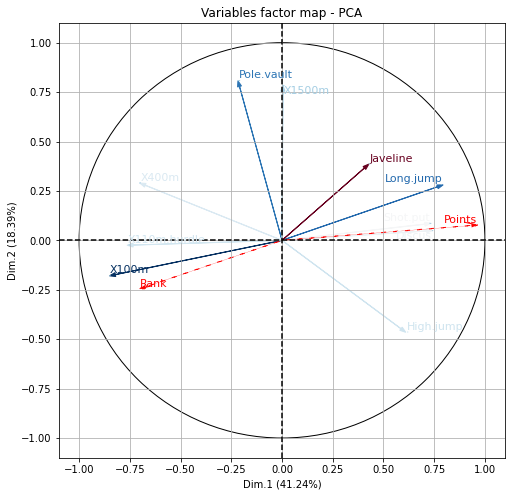

In [39]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_var(acp,color="cos2",repel=True)
plt.show()

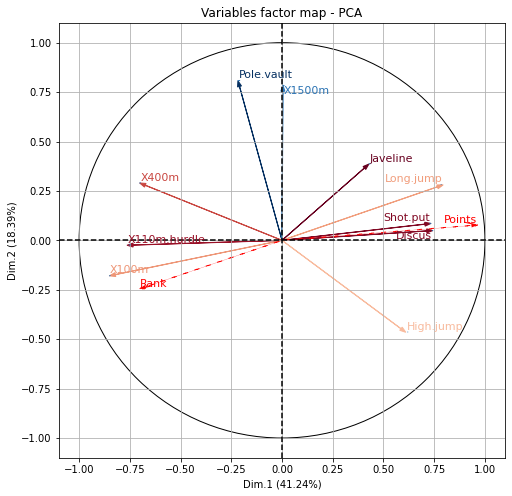

In [40]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_var(acp,color="contrib",repel=True)
plt.show()

In [41]:
np.random.seed(123)
color_numpy = np.random.normal(size=10)
color_numpy

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

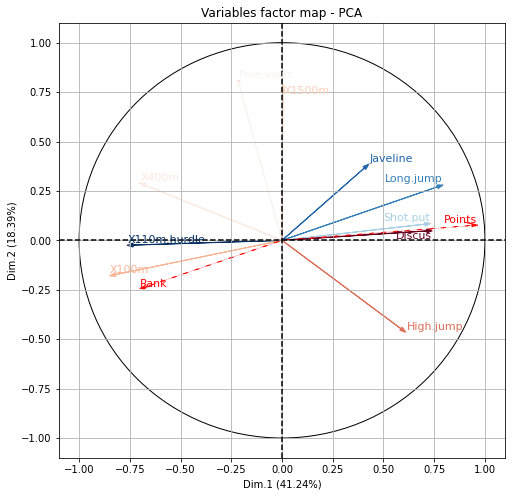

In [42]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_var(acp,color=color_numpy,repel=True)
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(acp.col_coord_)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 2])

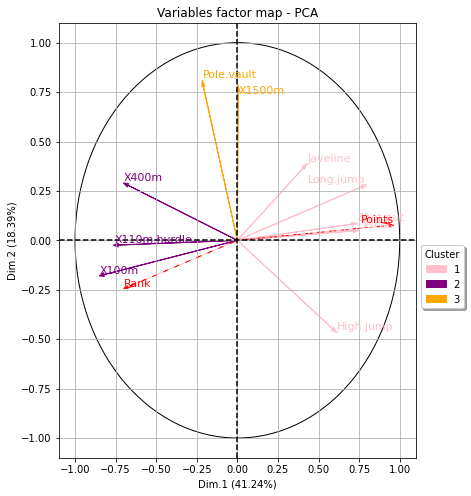

In [44]:
fig, axe = plt.subplots(figsize=(8,8))
plot_pca_var(acp,color=kmeans,repel=True)
plt.show()

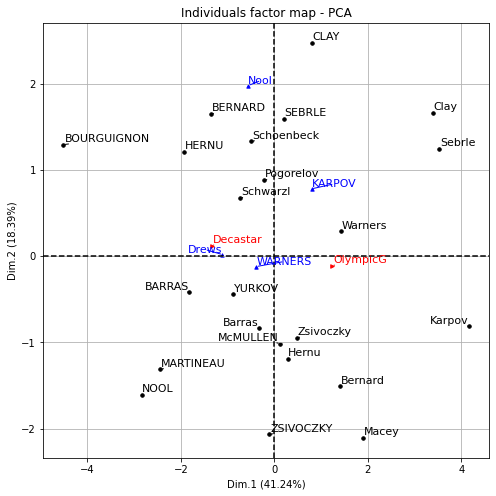

In [45]:
from scientisttools.pyplot import plotPCA
# Individuals plots
fig, axe = plt.subplots(figsize=(8,8))
plotPCA(acp,choice="ind",axis=[0,1],ax=axe,repel=True)
plt.show()

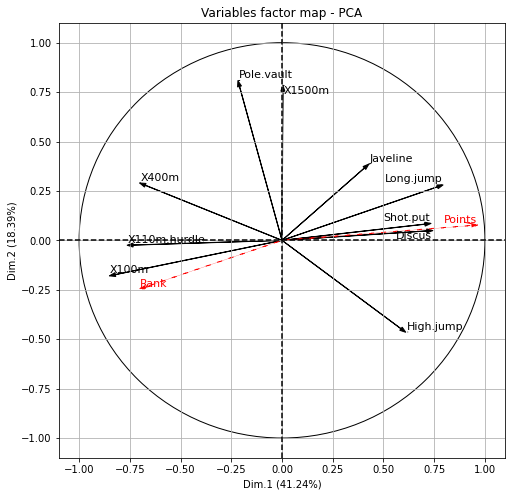

In [46]:
# Variables plot
fig, axe = plt.subplots(figsize=(8,8))
plotPCA(acp,choice="var",axis=[0,1],ax=axe,repel=True)
plt.show()

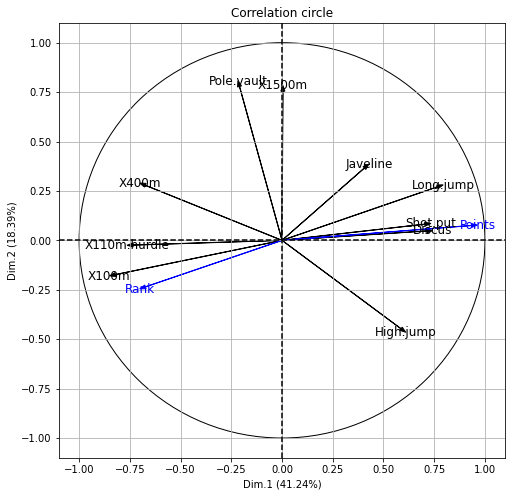

In [47]:
from scientisttools.pyplot import plot_correlation_circle
fig, axe = plt.subplots(figsize=(8,8))
plot_correlation_circle(acp,ax=axe)
plt.show()

## Contributions

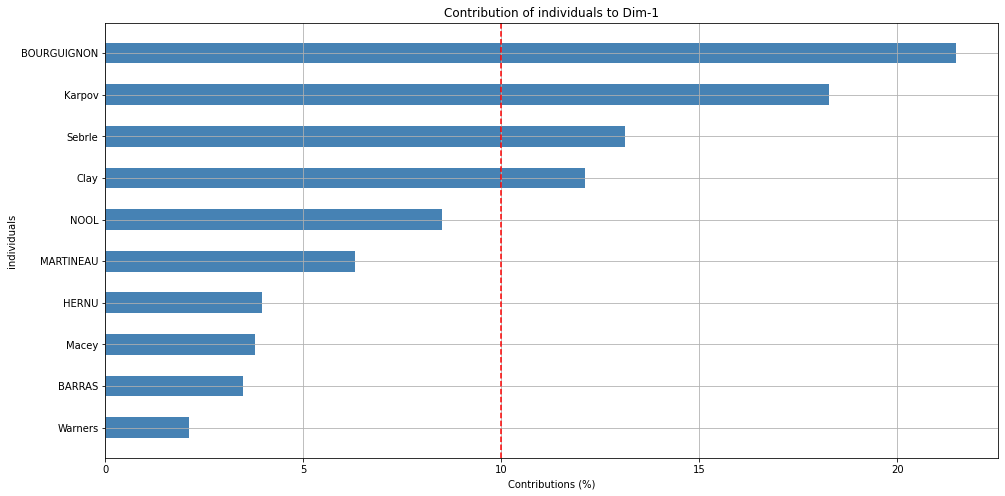

In [48]:
from scientisttools.pyplot import plot_contrib
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(acp,choice="ind",ax=axe)
plt.show()

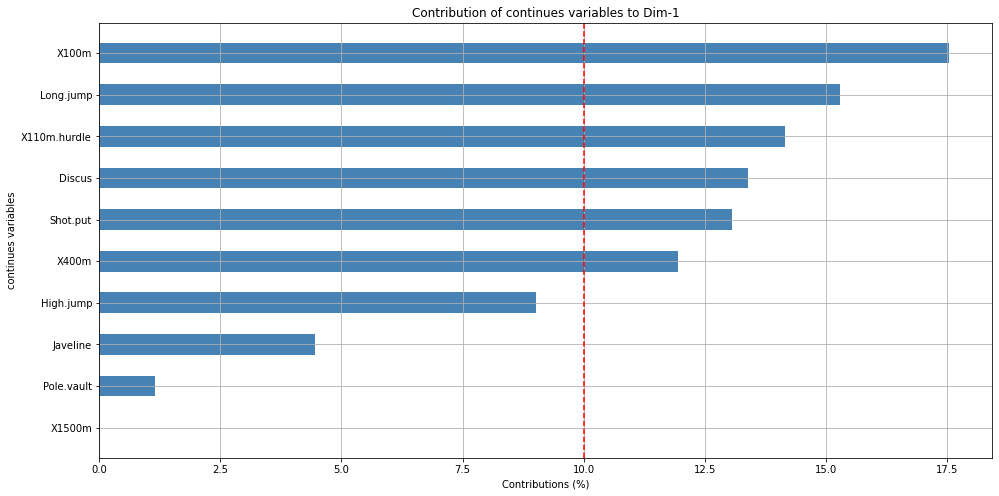

In [49]:
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(acp,choice="var",ax=axe)
plt.show()

## Cos2

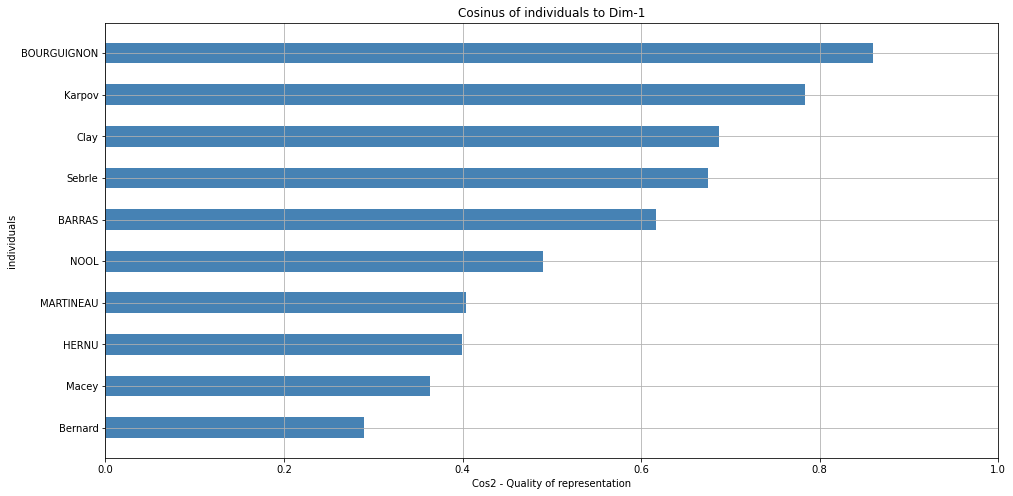

In [50]:
from scientisttools.pyplot import plot_cosines
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(acp,choice="ind",ax=axe)
plt.show()

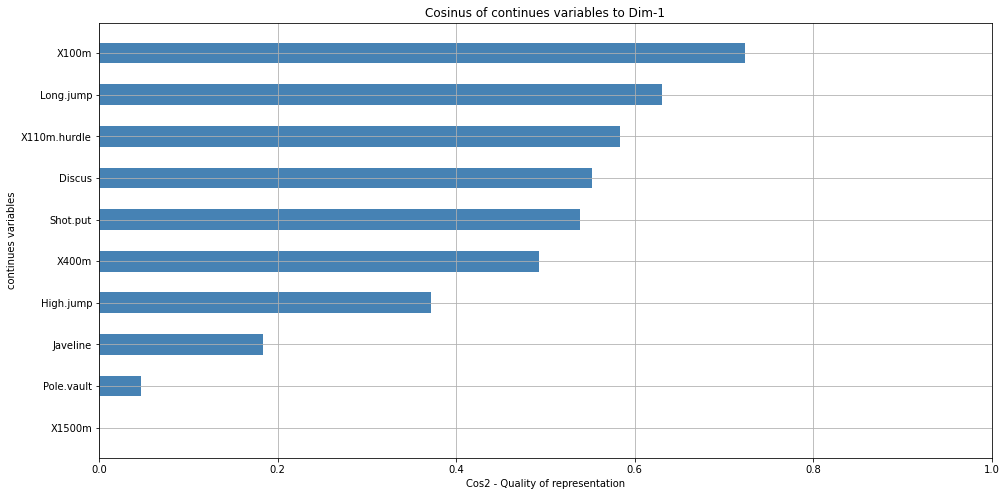

In [51]:
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(acp,choice="var",ax=axe)
plt.show()

In [52]:
# Summary
from scientisttools.extractfactor import summaryPCA
summaryPCA(acp,to_markdown=True)

                     Principal Component Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |   Dim.9 |   Dim.10 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|
| Variance                |   4.124 |   1.839 |   1.239 |   0.819 |   0.702 |   0.423 |   0.303 |   0.274 |   0.155 |    0.122 |
| Difference              |   2.286 |   0.599 |   0.42  |   0.118 |   0.279 |   0.12  |   0.028 |   0.119 |   0.033 |  nan     |
| % of var.               |  41.242 |  18.385 |  12.391 |   8.194 |   7.016 |   4.229 |   3.026 |   2.745 |   1.552 |    1.22  |
| Cumulative of % of var. |  41.242 |  59.627 |  72.019 |  80.213 |  87.229 |  91.458 |  94.483 |  97.228 |  98.78  |  100     |

Individuals (the 10 first)

| name      |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |   ctr |   cos2 |   Dim.2 |    ctr |